[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.sandbox.google.com/github/kornia/tutorials/blob/master/source/data_augmentation_mosiac.ipynb)

# Random Mosaic

In this tutorial we will show how we can quickly perform **mosaicing** using the features provided by the [`kornia.augmentation.RandomMosaic`](https://kornia.readthedocs.io/en/latest/augmentation.module.html#kornia.augmentation.RandomMosaic) API.
**Mosaicing** means taking several input images and combine their random crops into mosaic. 

## Install and get data

We install Kornia and some dependencies, and download a simple data sample

In [1]:
%%capture
!wget https://tinypng.com/images/social/website.jpg -O panda.jpg

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import torch

import kornia as K
from torchvision.transforms import transforms

to_tensor = transforms.ToTensor()
to_pil = transforms.ToPILImage()


def plot(img, box):
    img_vis = img.clone()
    img_vis = K.utils.draw_rectangle(
        img_vis, box, color=torch.tensor([255,0,0]))
    plt.imshow(K.tensor_to_image(img_vis))


def load_img(img_path):
    try:
        # not ready on Windows machine
        img = K.io.load_image(img_path, K.io.ImageLoadType.RGB32)
    except:
        import cv2
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = K.image_to_tensor(img).float() / 255.
    return img

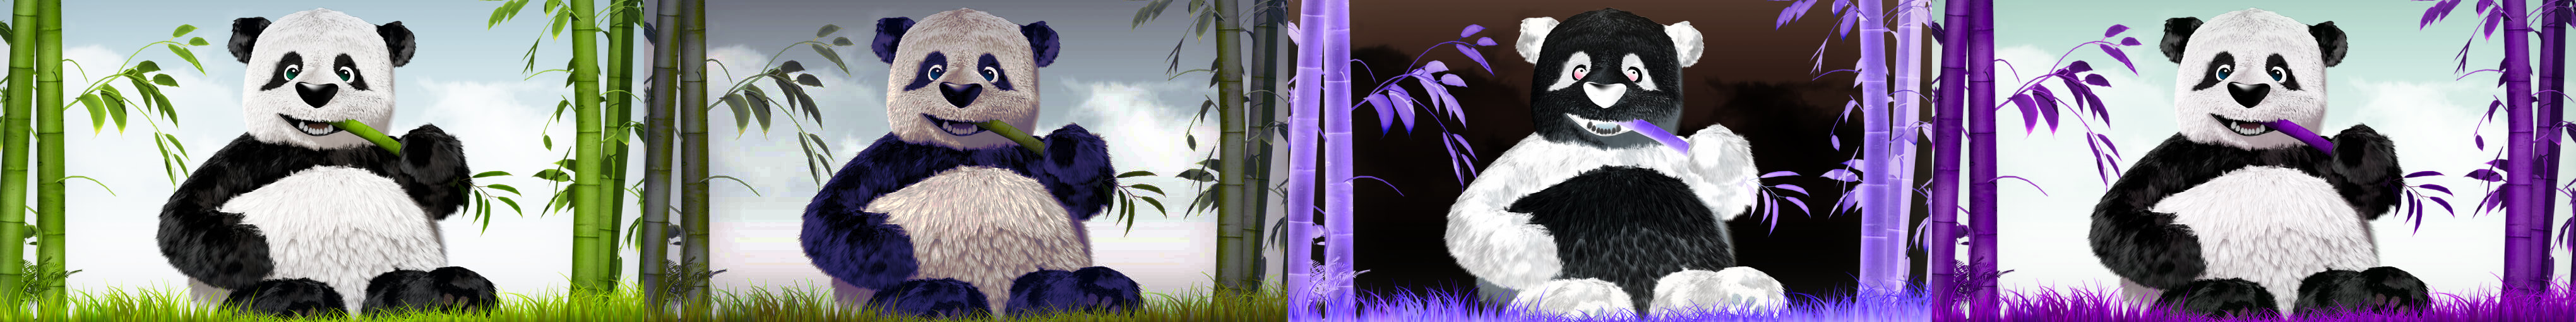

In [3]:
img1 = load_img("panda.jpg")
img2 = K.augmentation.RandomEqualize(p=1., keepdim=True)(img1)
img3 = K.augmentation.RandomInvert(p=1., keepdim=True)(img1)
img4 = K.augmentation.RandomChannelShuffle(p=1., keepdim=True)(img1)

to_pil(torch.cat([img1, img2, img3, img4], dim=-1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


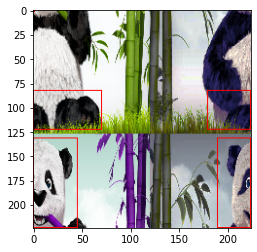

In [4]:
import torch

import kornia as K
from kornia.augmentation import RandomMosaic

x = K.core.concatenate([
    K.geometry.resize(img1[None], (224, 224)),
    K.geometry.resize(img2[None], (224, 224)),
    K.geometry.resize(img3[None], (224, 224)),
    K.geometry.resize(img4[None], (224, 224))
])

boxes = torch.tensor([
    [
        [70., 5, 150, 100],  # head
        [60, 180, 175, 220],  # feet
    ]
]).repeat(4, 1, 1)

aug = RandomMosaic(
    (224, 224),
    mosaic_grid=(2, 2), start_ratio_range=(0.3, 0.5), p=1., min_bbox_size=300,
    data_keys=['input', 'bbox_xyxy'])

y, y1 = aug(x, boxes)

plot(y[:1], y1[:1])